Importamos librerias y definimos la ruta de la base de datos

In [26]:
import os
import pandas as pd
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np

# Definir la ruta de la carpeta que contiene las imágenes
ruta_carpeta = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\TopicoIA\\Marzo\\BD\\corpus_images'



Recorremos toda la carpeta y hacemos una matriz con todos los datos de todas las imagenes

In [30]:
# Crear una lista para almacenar los datos de las imágenes
datos_imagen_recortada = {}
directorio = {'Imagen': [], 'Caracteristicas': [], 'Rostro': [], 'Etiqueta': []}
# Recorrer la carpeta para buscar archivos jpg
x = 0
for carpeta_nombre in os.listdir(ruta_carpeta):
    carpeta_ruta = os.path.join(ruta_carpeta, carpeta_nombre)
    if os.path.isdir(carpeta_ruta):
        for archivo_nombre in os.listdir(carpeta_ruta):
            
            x+=1
            try:
                archivo_ruta = os.path.join(carpeta_ruta, archivo_nombre)
                
                # Cargar la imagen utilizando PIL (Pillow)
                imagen = face_recognition.load_image_file(archivo_ruta)
                
                # Redimensionar la imagen a 150x150
                imagen_redimensionada = np.array(Image.fromarray(imagen).resize((150, 150)))
                # Obtener los landmarks faciales
                landmarks = face_recognition.face_landmarks(imagen_redimensionada)
                
                caracteristicas = []
                for clave,valor in landmarks[0].items():
                    checando = np.array(valor)
                    #print(checando.shape)
                    caracteristicas.append(checando)

                # Detectar los rostros en la imagen
                rostros = face_recognition.face_locations(imagen_redimensionada)

                #Recorta la cara
                cara = rostros[0]
                top, right, bottom, left = cara
                cara_recortada = imagen_redimensionada[top:bottom, left:right]
                
                # Agregar la información de la imagen al DataFrame
                #datos_imagen_recortada.append([imagen_redimensionada, caracteristicas,cara_recortada,carpeta_nombre])
                directorio['Imagen'].append(imagen_redimensionada)
                directorio['Caracteristicas'].append(caracteristicas)
                directorio['Rostro'].append(cara_recortada)
                directorio['Etiqueta'].append(carpeta_nombre)
                
            except Exception as e:
                print("Error en archivo:"+str(archivo_nombre))
            if x>20:
                break
            print(x)
print("Proceso terminado")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Proceso terminado


In [31]:
columnas = ['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta']
df_imagenes_recortadas = pd.DataFrame(directorio, columns=columnas)

df = df_imagenes_recortadas
df_imagenes_recortadas.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[165, 166, 161], [165, 166, 161], [165, 166,...","[[[62, 83], [62, 88], [62, 93], [63, 97], [64,...","[[[160, 162, 161], [160, 162, 161], [160, 162,...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[[[62, 83], [62, 87], [62, 92], [63, 96], [64,...","[[[160, 162, 160], [161, 162, 161], [160, 161,...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[[[63, 82], [63, 87], [63, 91], [64, 96], [65,...","[[[159, 161, 158], [160, 162, 159], [161, 162,...",bored
3,"[[[165, 166, 162], [165, 165, 164], [165, 165,...","[[[63, 83], [62, 87], [63, 92], [63, 97], [65,...","[[[159, 161, 158], [161, 163, 160], [155, 157,...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[[[63, 83], [63, 87], [63, 92], [63, 96], [64,...","[[[160, 162, 160], [161, 163, 161], [152, 154,...",bored


In [34]:
df_mario = pd.read_pickle('emotions_dataset.pkl')
df_mario.head()

,Imagen,Imagen con zoom,Hitos faciales,Etiquetas
0,"[[[165, 166, 161], [165, 166, 161], [165, 166,...","[[[[160 162 161], [160 162 161], [160 162 161]...","[[[62, 83], [62, 88], [62, 93], [63, 97], [64,...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[[[[160 162 160], [161 162 161], [160 161 160]...","[[[62, 83], [62, 87], [62, 92], [63, 96], [64,...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[[[[159 161 158], [160 162 159], [161 162 160]...","[[[63, 82], [63, 87], [63, 91], [64, 96], [65,...",bored
3,"[[[165, 166, 162], [165, 165, 164], [165, 165,...","[[[[159 161 158], [161 163 160], [155 157 154]...","[[[63, 83], [62, 87], [63, 92], [63, 97], [65,...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[[[[160 162 160], [161 163 161], [152 154 151]...","[[[63, 83], [63, 87], [63, 92], [63, 96], [64,...",bored


In [35]:
valorAlda = df['Caracteristicas'][0]
valorMario = df_mario['Hitos faciales'][0]

In [38]:
print(valorAlda.shape)

AttributeError: 'list' object has no attribute 'shape'

In [37]:
print(valorMario.shape)

[[[ 62  83]
  [ 62  88]
  [ 62  93]
  [ 63  97]
  [ 64 102]
  [ 66 106]
  [ 68 110]
  [ 72 113]
  [ 77 114]
  [ 83 113]
  [ 87 111]
  [ 90 107]
  [ 92 103]
  [ 94  98]
  [ 94  94]
  [ 95  89]
  [ 95  84]
  [ 65  75]
  [ 66  72]
  [ 69  70]
  [ 72  69]
  [ 74  70]
  [ 80  70]
  [ 84  69]
  [ 87  69]
  [ 90  72]
  [ 91  75]
  [ 77  76]
  [ 77  79]
  [ 77  82]
  [ 77  86]
  [ 74  90]
  [ 76  90]
  [ 77  91]
  [ 79  90]
  [ 81  90]
  [ 68  79]
  [ 69  77]
  [ 71  77]
  [ 73  78]
  [ 71  78]
  [ 69  79]
  [ 82  78]
  [ 84  77]
  [ 86  77]
  [ 88  78]
  [ 86  79]
  [ 84  78]
  [ 71  99]
  [ 73  96]
  [ 76  95]
  [ 78  96]
  [ 80  95]
  [ 82  96]
  [ 85  99]
  [ 84  99]
  [ 80  98]
  [ 78  98]
  [ 76  97]
  [ 72  99]
  [ 85  99]
  [ 82 100]
  [ 80 101]
  [ 77 101]
  [ 75 101]
  [ 73 100]
  [ 71  99]
  [ 72  99]
  [ 75  98]
  [ 77  98]
  [ 80  98]
  [ 84  99]]]


In [33]:
# Crear una nueva columna para almacenar solo los registros que cumplan con la forma deseada
df['Verdadero'] = df['Caracteristicas'].apply(lambda x: x if np.array(x).shape == (1, 72, 2) else None)

# Eliminar los registros que no cumplen con la forma deseada
df = df.dropna(subset=['Hitos faciales válidos'])

# Convertir la columna 'Hitos faciales válidos' en un array NumPy
puntos = np.array(df['Hitos faciales'].tolist())

# Verificar la forma de X
print(puntos.shape)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (9,) + inhomogeneous part.

Conversion a JSON. Es muy pesado, por lo que pasamos de ello.

In [9]:
#df_imagenes_recortadas.to_json('test.csv')

In [10]:
#df_jason = pd.read_json('test.csv')
#df_jason.head()

Pickle es una buena opción. Este se usa para serializar objetos en Python. Lamentablemente su uso está únicamente destinado a Python

In [11]:
#df_imagenes_recortadas.to_pickle('test.pkl')

In [12]:
#df_pickle = pd.read_pickle('test.pkl')
#df_pickle.head()

HDF5 es una gran opción. Se usa para el manejo de datos y pueden utilizarlo otros lenguajes o programas como MATLAB y Java. Está destinado para manejo de grandes datos.

Instalar tables para usar hdf5

In [6]:
pip install tables

  Using cached tables-3.9.2-cp39-cp39-win_amd64.whl.metadata (2.3 kB)
  Using cached numexpr-2.9.0-cp39-cp39-win_amd64.whl.metadata (8.1 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached blosc2-2.5.1-cp39-cp39-win_amd64.whl.metadata (9.4 kB)
  Using cached ndindex-1.8-py3-none-any.whl.metadata (3.4 kB)
  Using cached msgpack-1.0.8-cp39-cp39-win_amd64.whl.metadata (9.4 kB)
Using cached tables-3.9.2-cp39-cp39-win_amd64.whl (4.4 MB)
Using cached blosc2-2.5.1-cp39-cp39-win_amd64.whl (2.3 MB)
Using cached numexpr-2.9.0-cp39-cp39-win_amd64.whl (96 kB)
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
Using cached ndindex-1.8-py3-none-any.whl (91 kB)
Using cached msgpack-1.0.8-cp39-cp39-win_amd64.whl (75 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
df_imagenes_recortadas.to_hdf('nuevoTesto.h5', key='dataframe', mode='w')

C:\Users\Waldosir\AppData\Local\Temp\ipykernel_7772\2804552314.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta'], dtype='object')]

  df_imagenes_recortadas.to_hdf('nuevoTesto.h5', key='dataframe', mode='w')


Leer el archivo creado

In [13]:
df_HDF = pd.read_hdf('nuevoTesto.h5')


In [14]:
df_HDF.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[165, 166, 161], [165, 166, 161], [165, 166,...","[[[62, 83], [62, 88], [62, 93], [63, 97], [64,...","[[[160, 162, 161], [160, 162, 161], [160, 162,...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[[[62, 83], [62, 87], [62, 92], [63, 96], [64,...","[[[160, 162, 160], [161, 162, 161], [160, 161,...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[[[63, 82], [63, 87], [63, 91], [64, 96], [65,...","[[[159, 161, 158], [160, 162, 159], [161, 162,...",bored
3,"[[[165, 166, 162], [165, 165, 164], [165, 165,...","[[[63, 83], [62, 87], [63, 92], [63, 97], [65,...","[[[159, 161, 158], [161, 163, 160], [155, 157,...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[[[63, 83], [63, 87], [63, 92], [63, 96], [64,...","[[[160, 162, 160], [161, 163, 161], [152, 154,...",bored


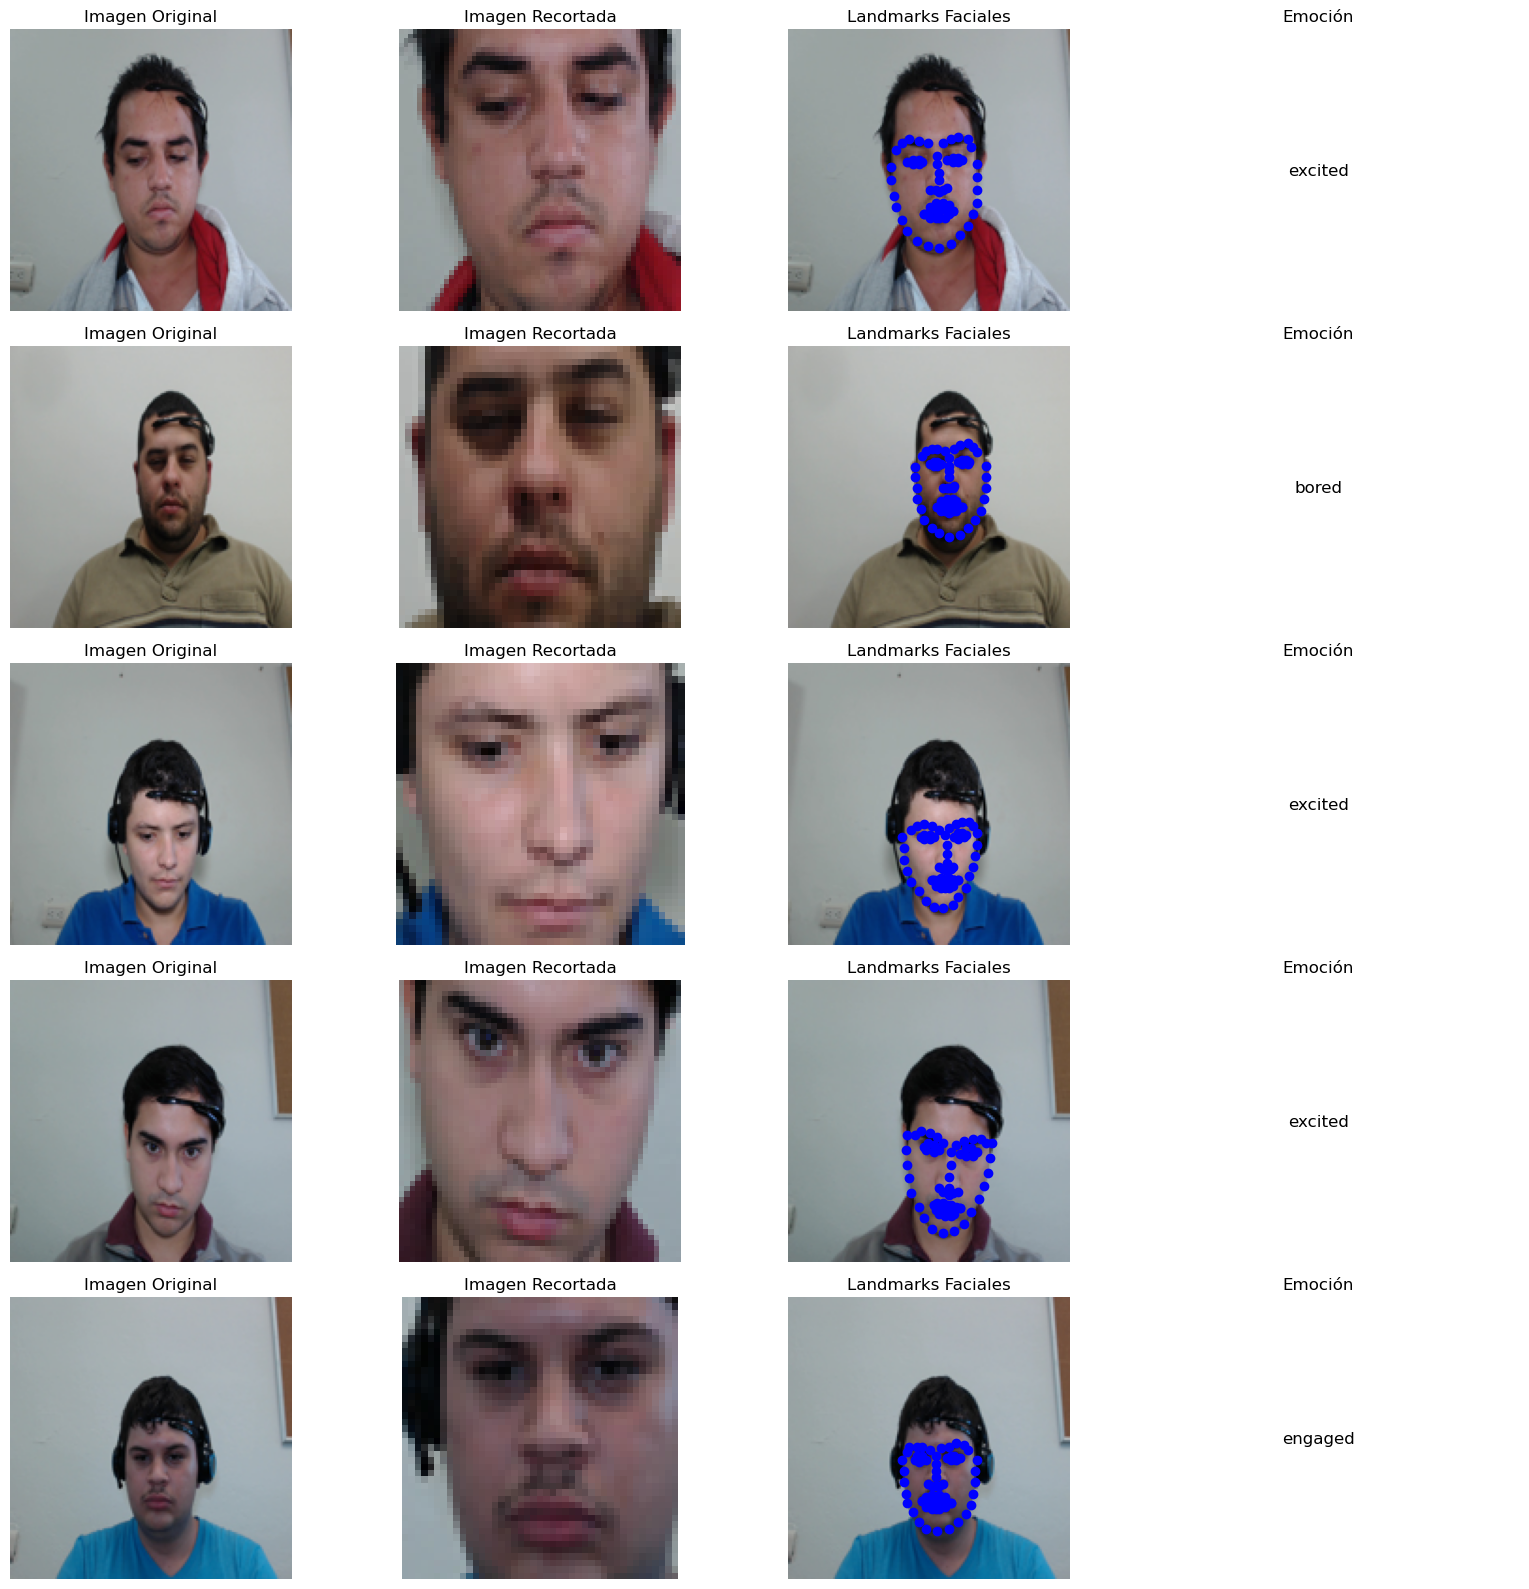

In [15]:
df_ejemploHDF = df_HDF.sample(n=5)

# Visualizar las imágenes seleccionadas con los rostros detectados y los landmarks faciales
fig, axes = plt.subplots(nrows=len(df_ejemploHDF), ncols=4, figsize=(16, 16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    # Subgráfico para la imagen original
    ax0 = axes[i, 0]
    ax0.imshow(row['Imagen'])
    ax0.set_title("Imagen Original")
    ax0.axis('off')
    
    # Subgráfico para la imagen recortada con el rostro detectado
    ax1 = axes[i, 1]
    imagen_recortada = row['Rostro']
    ax1.imshow(imagen_recortada)
    ax1.set_title("Imagen Recortada")
    ax1.axis('off')
    
    # Subgráfico para los landmarks faciales
    ax2 = axes[i, 2]
    ax2.imshow(row['Imagen'])

    for landmark in row['Caracteristicas']:
        for punto in landmark:
            ax2.plot(punto[0], punto[1], marker='o', markersize=6, color='blue')

    

    ax2.set_title("Landmarks Faciales")
    ax2.axis('off')
    
    # Subgráfico para la emoción (si está disponible)
    ax3 = axes[i, 3]
    # Aquí puedes agregar código para mostrar la emoción en lugar de un gráfico vacío
    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax3.set_title("Emoción")
    ax3.axis('off')

plt.tight_layout()
plt.show()

Sacar muestras de una fila:

In [6]:
# Acceder a una fila específica (por ejemplo, la primera fila)
fila_seleccionada = df_HDF.iloc[0]

# Extraer un dato como si fuera un array
dato = fila_seleccionada['Imagen']  # Suponiendo que deseas extraer el dato de la columna 'Imagen'

# Ahora 'dato' contiene el valor de 'Imagen' de la primera fila del DataFrame
print(dato)

[[[165 165 162]
  [165 166 161]
  [165 166 161]
  ...
  [170 169 167]
  [171 170 168]
  [170 169 167]]

 [[165 165 163]
  [166 167 162]
  [166 167 162]
  ...
  [170 169 167]
  [171 170 168]
  [171 170 168]]

 [[165 166 163]
  [166 167 164]
  [165 166 161]
  ...
  [170 169 167]
  [171 170 168]
  [171 170 168]]

 ...

 [[138 138 136]
  [138 138 136]
  [138 138 136]
  ...
  [153 152 148]
  [152 153 148]
  [152 152 150]]

 [[138 138 136]
  [138 138 136]
  [138 138 136]
  ...
  [152 153 148]
  [152 153 148]
  [152 152 149]]

 [[137 137 135]
  [137 137 135]
  [137 137 135]
  ...
  [151 152 147]
  [151 152 147]
  [151 151 149]]]
